# Qiskit & IBM Quantum Workshop



**May 22, 2023 <br/>**
**For NQCH Softserve Quantum Incubator, Singapore<br>**
This tutorial was adapted from notebooks by: _Abby Mitchell - Quantum Developer Advocate (https://abbymitchell.dev) IBM Quantum_ and Qiskit tutorial documentations -: https://qiskit.org/documentation/tutorials.html

## How to Use this Notebook in your IBM Quantum Lab Account



1. Go to http://qisk.it/NSQI_23 for the workshop resources

<img src="qrcode22.png" width=300>

2. Click 'raw' button in GitHub, this will open the notebook file in a new tab

<img src="raw_button.png" width=600>

3. Right click on the raw file and save the file in jupyter notebook format (`.ipynb`)

<img src="save.png" width=600>

4. In IBM Quantum Lab, select upload button on in top left and upload the notebook file

<img src="upload_button.png" width=600>

5. If you didn't save it in `.ipynb` format you can rename the file in the jupyter lab

<img src="rename_button.png" width=600>

6. Now you can open the notebook in your IBM Quantum Lab environment! (note: if you want the images to display in your lab version you will need to download them from the github folder where the notebook is and upload it into your lab folder as well)

<img src="open_notebook.png" width=600>


# Goal: Show you the toolbox - Breadth, not depth! Questions: prompt me anytime you have one! :D 

### Contents:

- Welcome & About Me!


- Let's Explore IBM Quantum Labs, composer, services etc.


- What is Qiskit & the Qiskit Ecosystem


- Representing Quantum States (Qiskit):
  - [Quantum Circuits](https://qiskit.org/documentation/apidoc/circuit.html) (qiskit.circuit)
  - [Quantum Information](https://qiskit.org/documentation/apidoc/quantum_info.html) (qiskit.quantum_info)


- Running on devices and getting results (Qiskit Ecosystem):
  - [Qiskit Aer (Simulator)](https://qiskit.org/documentation/aer/)
  - IBM Quantum Devices
  - Other providers


- Visualising Results (Qiskit)
  - [Visualization](https://qiskit.org/documentation/apidoc/visualization.html) (qiskit.visualization)


- NEW(ish)! Runtime Primitives (Qiskit & Qiskit Ecosystem)
  - [Qiskit Primitives](https://qiskit.org/documentation/apidoc/primitives.html) (qiskit.primitives)
  - [IBM Qiskit Runtime](https://qiskit.org/documentation/partners/qiskit_ibm_runtime/)


- Applications based Ecosystem Packages
   - High Level Applications - [Qiskit Nature](https://qiskit.org/documentation/nature/), [Qiskit Machine Learning](https://qiskit.org/documentation/machine-learning/)
   - Low Level Applications - [Qiskit Experiments](https://qiskit.org/documentation/experiments/), [Qiskit Dynamics](https://qiskit.org/documentation/dynamics/)


- What Next?


# Qiskit overview: Main Packages

![](qiskit_overview.png)





### Including the Ecosystem:
![](ecosystem.png)

## The Qiskit Ecosystem

https://qiskit.org/ecosystem

**Three Tiers:**
- Main
- Extensions
- Community

--> You can submit your open-source project to the Ecosystem!

What we'll focus on: mostly Qiskit (Terra)  
If we have time: other packages

# Time for some code! (finally!)


Here, we provide an overview of working with Qiskit.  The fundamental package of Qiskit is Terra that provides the basic building blocks necessary to program quantum computers. The fundamental unit of Qiskit is the [quantum circuit](https://en.wikipedia.org/wiki/Quantum_circuit). A basic workflow using Qiskit consists of two stages: **Build** and **Execute**. **Build** allows you to make different quantum circuits that represent the problem you are solving, and **Execute** that allows you to run them on different backends.  After the jobs have been run, the data is collected and postprocessed depending on the desired output.

In [4]:
import numpy as np

# Importing standard Qiskit libraries
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# from ibm_quantum_widgets import *

# Additional libraries
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_provider import IBMProvider, least_busy
from qiskit_ibm_provider.job import job_monitor

# Loading your IBM Quantum account(s)
provider = IBMProvider(instance='ibm-q/open/main')

## Qiskit submodules we'll be using

- [Quantum Circuits](https://qiskit.org/documentation/apidoc/circuit.html) (`qiskit.circuit`)
- [Quantum Information](https://qiskit.org/documentation/apidoc/quantum_info.html) (`qiskit.quantum_info`)
- [Qiskit Aer (Simulator)](https://qiskit.org/documentation/aer/)
- [Visualization](https://qiskit.org/documentation/apidoc/visualization.html) (`qiskit.visualization`)
- [Primitives](https://qiskit.org/documentation/apidoc/primitives.html) (`qiskit.primitives`)


Other modules: https://qiskit.org/documentation/apidoc/terra.html

## Quantum Circuit

Gates are matrices, applying gates is matrix multiplaction

Simplest example - the Bell State

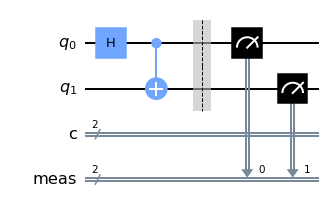

In [77]:
from qiskit import QuantumCircuit

# Initialize quantum circuit
bell = QuantumCircuit(2,2)

# Apply gates
bell.h(0)
bell.cx(0,1)

# Measure qubits
bell.measure_all()

# Visualise circuit
bell.draw(output="mpl")


Total count for 00 and 11 are: {'00 00': 517, '11 00': 483}


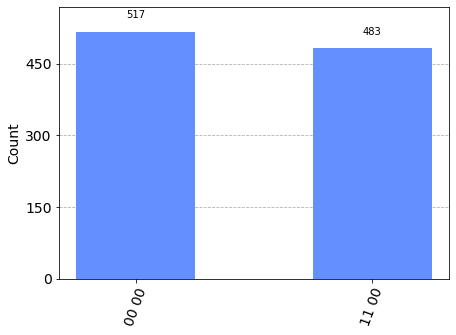

In [8]:
# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
simulator = Aer.get_backend("aer_simulator")
compiled_circuit = transpile(bell, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
from qiskit.visualization import plot_histogram
plot_histogram(counts)

As you proceed through the tutorials you will find more gates and circuits; below is an example of a quantum circuit that makes a three-qubit GHZ state

$$|\psi\rangle = \left(|000\rangle+|111\rangle\right)/\sqrt{2}.$$

To create such a state, we start with a three-qubit quantum register. By default, each qubit in the register is initialized to $|0\rangle$. To make the GHZ state, we apply the following gates:
- A Hadamard gate $H$ on qubit 0, which puts it into the superposition state $\left(|0\rangle+|1\rangle\right)/\sqrt{2}$.
- A controlled-Not operation ($C_{X}$) between qubit 0 and qubit 1.
- A controlled-Not operation between qubit 0 and qubit 2.

On an ideal quantum computer, the state produced by running this circuit would be the GHZ state above.

In Qiskit, operations can be added to the circuit one by one, as shown below.

<div class="alert alert-block alert-success">

### Exercise: Create a 3 qubit GHZ State and measure it.


</div>

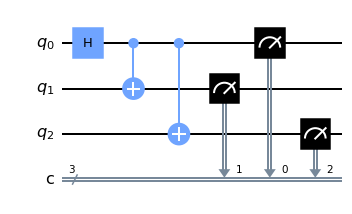

In [7]:
# Recreate the circuit as shown below

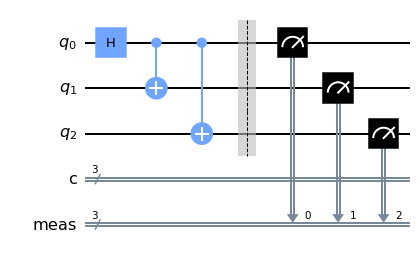

In [11]:
# Exercise: Recreate the circuit as shown above.
ghz = QuantumCircuit(3,3)
# Add a H gate on qubit 0, putting this qubit in superposition.

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.

# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.

# Measure qubits



# Draw the circuit
ghz.draw(output="mpl")

In [ ]:
simulator = Aer.get_backend("aer_simulator")
compiled_circuit = transpile(ghz, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 000 and 111 are:",counts)

# Draw the circuit
from qiskit.visualization import plot_histogram
plot_histogram(counts)

### Customized gates

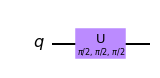

In [59]:
# custom rotations

circuit = QuantumCircuit(1)
circuit.u(np.pi/2,np.pi/2,np.pi/2,0)

circuit.draw(output="mpl")

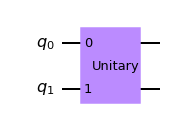

In [60]:
# matrix -> unitary gate

matrix = [[0, 0, 0, 1],
          [0, 0, 1, 0],
          [1, 0, 0, 0],
          [0, 1, 0, 0]]
          
circuit = QuantumCircuit(2)
circuit.unitary(matrix, [0, 1])

circuit.draw(output="mpl")

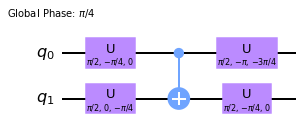

In [61]:
circuit.decompose().draw(output="mpl")

### State preparation

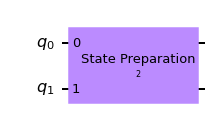

In [62]:
qc = QuantumCircuit(2)

# State Preparation
# qc2.prepare_state('01')
# qc.prepare_state([0,1, 0, 0])
qc.prepare_state(2)

qc.draw(output="mpl")

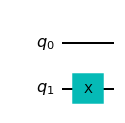

In [64]:
qc.decompose().draw(output="mpl")

### Parametric Circuits** - Great for Variational Algorithms

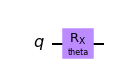

In [65]:
from qiskit.circuit import Parameter

# Define a variable theta to be a parameter with name 'theta'
theta = Parameter('theta')

# Initialize a quantum circuit with one qubit
quantum_circuit = QuantumCircuit(1)

# Add a parametrized RX rotation on the qubit
quantum_circuit.rx(theta, 0)

quantum_circuit.draw(output="mpl")

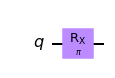

In [70]:
# Set the value of the parameter
theta_value = np.pi

# Bind the value to the parametrized circuit
qc = quantum_circuit.bind_parameters({theta: theta_value})

qc.draw(output="mpl")

#### Using Circuit templates

- **Doc References:**  
       - **Encoding featuremaps**: [https://qiskit.org/documentation/apidoc/circuit_library.html#data-encoding-circuits](https://qiskit.org/documentation/apidoc/circuit_library.html#data-encoding-circuits)  
       - **Ansatz**: [https://qiskit.org/documentation/apidoc/circuit_library.html#n-local-circuits](https://qiskit.org/documentation/apidoc/circuit_library.html#n-local-circuits)
       
For example, to use the Qiskit [**`EfficientSU2`**](https://qiskit.org/documentation/stubs/qiskit.circuit.library.EfficientSU2.html) circuit to encode 12 parameters

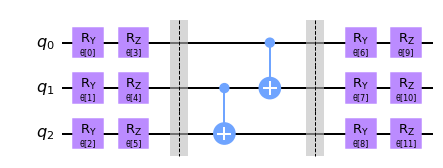

In [9]:
from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap, PauliFeatureMap, StatePreparation # Encoding
from qiskit.circuit.library import RealAmplitudes, EfficientSU2, ExcitationPreserving, PauliTwoDesign, TwoLocal, NLocal # Ansatz

circuit = EfficientSU2(num_qubits=3, reps=1, insert_barriers=True)
circuit.decompose().draw(output='mpl')

Here we encode the datapoint $x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2]$ with 12 parameters, using each of the parameterized gates and bind them

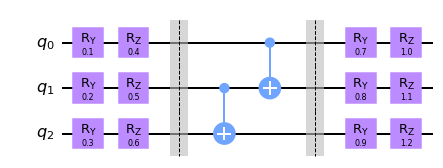

In [10]:
x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2]

encode = circuit.bind_parameters(x)
encode.decompose().draw(output='mpl')

The Qiskit [**`ZZFeatureMap`**](https://qiskit.org/documentation/stubs/qiskit.circuit.library.ZZFeatureMap.html) circuit with 3 qubits, only encodes a datapoint of 3 parameter values, despite having 6 parameterized gates:

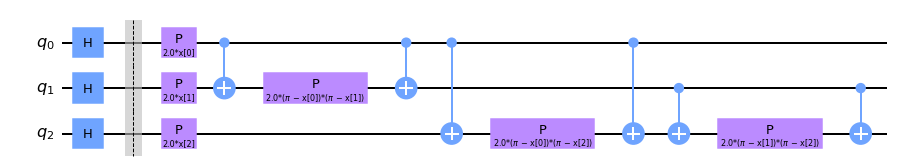

In [11]:
from qiskit.circuit.library import ZZFeatureMap

circuit = ZZFeatureMap(3, reps=1, insert_barriers=True)
circuit.decompose().draw(output='mpl')

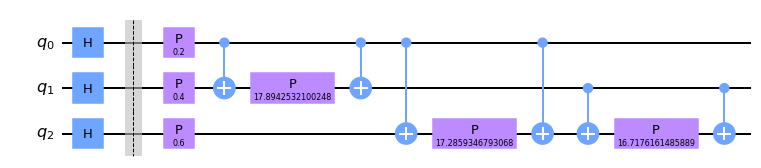

In [12]:
x = [0.1,0.2,0.3]

encode = circuit.bind_parameters(x)
encode.decompose().draw(output='mpl')

<div class="alert alert-block alert-success">

### Exercise: Data Encoding

Encode the data point $x = (-0.1,0.2)$ using the `ZZFeatureMap` with 4 repetitions and default data mapping function. 


</div>

In [ ]:
from qiskit.circuit.library import ZZFeatureMap

x = [-0.1,0.2]
# YOUR CODE HERE


# circuit = 
# encode = 
circuit.decompose().draw(output='mpl')

## Quantum Info

In [79]:
from qiskit.quantum_info.operators import Operator, Pauli

In [80]:
XX = Operator([[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]])
XX

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

Other Qiskit classes can be converted to `Operator`s

- `Pauli` objects (also from quantum info module)

- `Gate` and `Instruction` objects

- `QuantumCircuit` objects

In [81]:
# Create an Operator from a Pauli object

pauliXX = Pauli('XX')
Operator(pauliXX)

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [82]:
from qiskit.extensions import CXGate

# Create an Operator for a Gate object
Operator(CXGate())

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [83]:
# Create an operator from a QuantumCircuit object
circ = QuantumCircuit(10)
circ.h(0)
for j in range(1, 10):
    circ.cx(j-1, j)

# Convert circuit to an operator by implicit unitary simulation
Operator(circ)

Operator([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          ...,
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j]],
         input_dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2), output_dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2))

In [84]:
# Create operators
X = Operator(Pauli('X'))
Y = Operator(Pauli('Y'))

# X.tensor(Y) # X tensor Y
# X.compose(Y) # YX

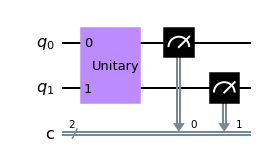

In [85]:
# Create an operator
XX = Operator(Pauli('XX'))

# Add to a circuit
circ = QuantumCircuit(2, 2)
circ.append(XX, [0, 1])
circ.measure([0,1], [0,1])
circ.draw(output="mpl")

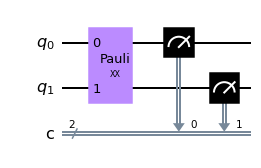

In [86]:
# Add to Pauli operator to circuit
circ2 = QuantumCircuit(2, 2)
circ2.append(Pauli('XX'), [0, 1])
circ2.measure([0,1], [0,1])
circ2.draw(output="mpl")

## Now we've created our circuits, let's get some results!

## Simulator - Qiskit Aer 

In [26]:
from qiskit import Aer

Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

Let's simulate some results from our bell state

In [27]:
print(bell)

        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
   c: 2/══════════════╬══╬═
                      ║  ║ 
meas: 2/══════════════╩══╩═
                      0  1 


In [28]:
from qiskit import transpile

# choose simulator backend
simulator = Aer.get_backend('aer_simulator')

# Transpile for simulator
bell_circ = transpile(bell, simulator)

# Run and get counts
result = simulator.run(bell_circ).result()
counts = result.get_counts(bell_circ)
print(counts)

{'11 00': 526, '00 00': 498}


In [88]:
# get results for each shot

result = simulator.run(bell_circ, shots=10, memory=True).result()
counts = result.get_counts()
memory = result.get_memory(bell_circ)
print(counts)
print(memory)

{'00 00': 5, '11 00': 5}
['11 00', '11 00', '11 00', '00 00', '11 00', '00 00', '00 00', '00 00', '11 00', '00 00']


Simulate with Noise

In [30]:
from qiskit.providers.fake_provider import FakeBelem
from qiskit.providers.aer import AerSimulator

# initialise simulator based on fake backend
device_backend = FakeBelem()
sim_bel = AerSimulator.from_backend(device_backend)

# Transpile the circuit for the noisy basis gates
tcirc = transpile(bell, sim_bel)

# Execute noisy simulation and get counts
result_noise = sim_bel.run(tcirc).result()
counts_noise = result_noise.get_counts(0)

print(counts)
print(counts_noise)


{'11 00': 526, '00 00': 498}
{'01 00': 34, '11 00': 444, '10 00': 51, '00 00': 495}


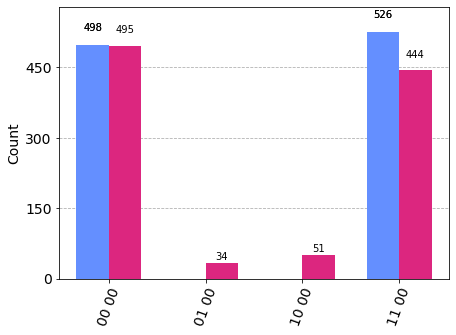

In [31]:
from qiskit.visualization import plot_histogram
plot_histogram([counts,counts_noise])

In [34]:
# get statevector info
# (must construct quantum circuit without measure)

circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0,1)

circ.save_statevector()

# choose simulator backend
sim = Aer.get_backend('aer_simulator')

# Transpile for simulator
tr_circ = transpile(circ, sim)

# Run and get counts
sv_res = sim.run(tr_circ).result()
print(sv_res.get_statevector())

# Print it as TeX
array_to_latex(sv_res.get_statevector())

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

In [27]:
# get unitary matrix for circ with simulator
# (must construct quantum circuit without measure)

circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0,1)

circ.save_unitary()

# choose simulator backend
sim = Aer.get_backend('aer_simulator')

# Transpile for simulator
tr_circ = transpile(circ, sim)

# Run and get counts
u_res = sim.run(tr_circ).result()

array_to_latex(u_res.get_unitary())


<IPython.core.display.Latex object>

## Transpilation

### Overview

Transpilation is the process of rewriting a given input circuit to match the topology of a specific quantum device, and/or to optimize the circuit for execution on present day noisy quantum systems.

Most circuits must undergo a series of transformations that make them compatible with a given target device, and optimize them to reduce the effects of noise on the resulting outcomes. Rewriting quantum circuits to match hardware constraints and optimizing for performance can be far from trivial. The flow of logic in the rewriting tool chain need not be linear, and can often have iterative sub-loops, conditional branches, and other complex behaviors. That being said, the basic building blocks follow the structure given below:



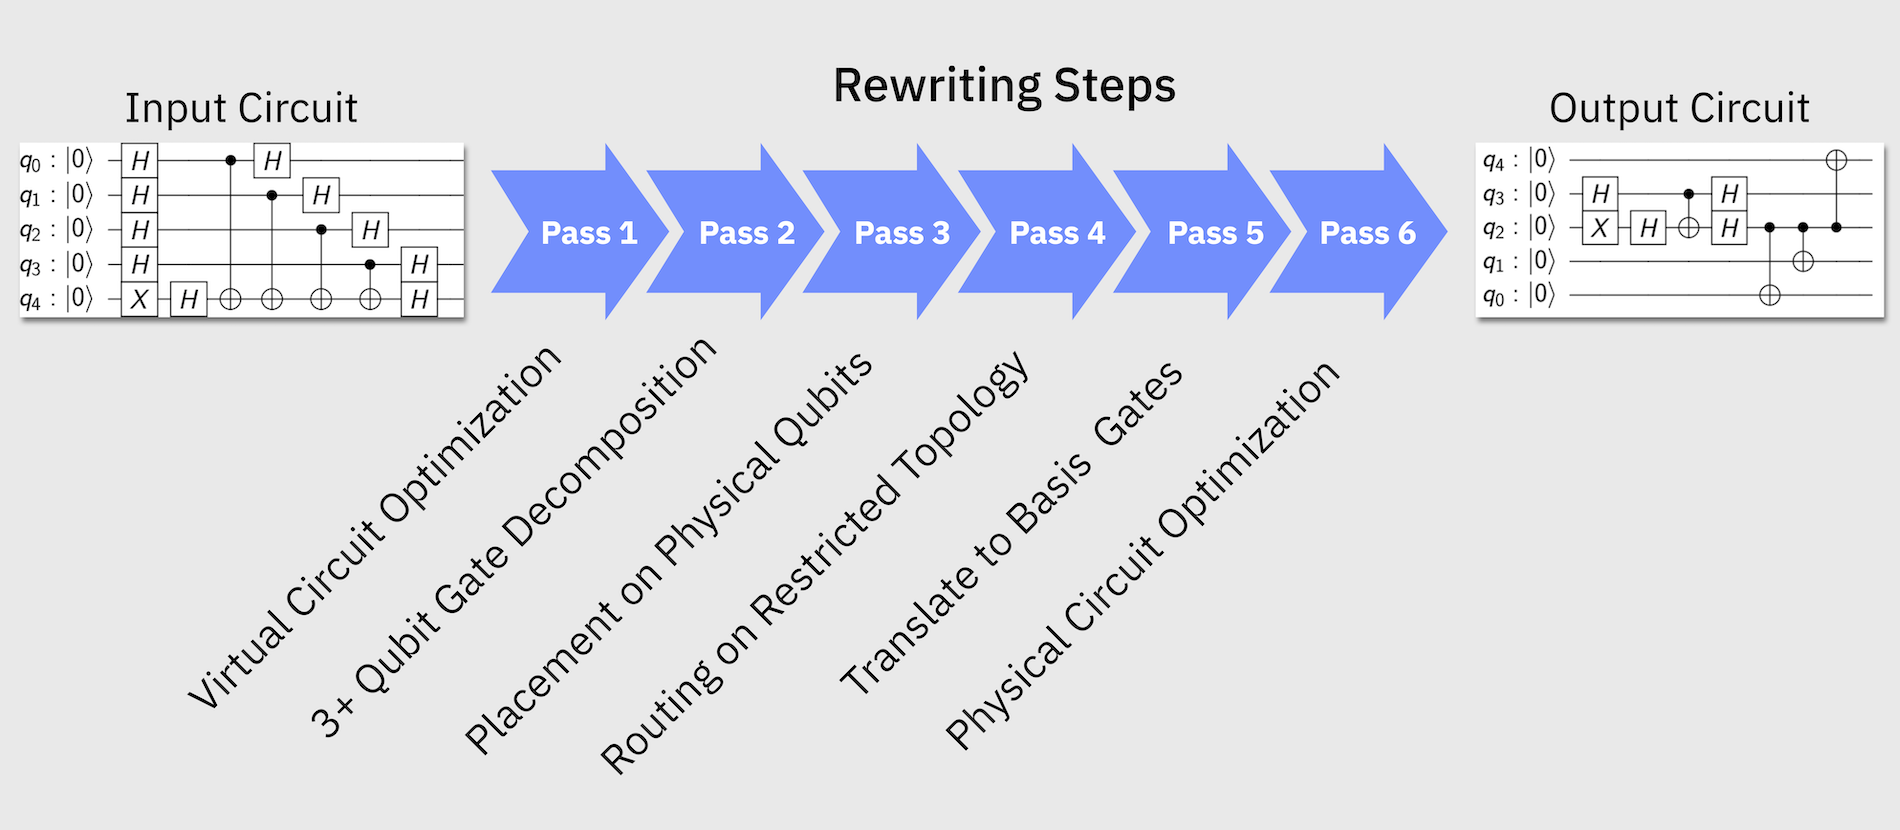

Qiskit has four pre-built transpilation pipelines available here: qiskit.transpiler.preset_passmanagers. Unless the reader is familiar with quantum circuit optimization methods and their usage, it is best to use one of these ready-made routines.



### Supplementary Information

####  Basis gates

When writing a quantum circuit you are free to use any quantum gate (unitary operator) that you like, along with a collection of non-gate operations such as qubit measurements and reset operations. However, when running a circuit on a real quantum device one no longer has this flexibility. Due to limitations in, for example, the physical interactions between qubits, difficulty in implementing multi-qubit gates, control electronics etc, a quantum computing device can only natively support a handful of quantum gates and non-gate operations. In the present case of IBM Q devices, the native gate set can be found by querying the devices themselves, and looking for the corresponding attribute in their configuration:

In [1]:
from qiskit.providers.fake_provider import FakeVigo

backend = FakeVigo()
    
backend.configuration().basis_gates

['id', 'rz', 'sx', 'x', 'cx']

Every quantum circuit run on an IBM Q device must be expressed using only these basis gates. For example, suppose one wants to run a simple phase estimation circuit:

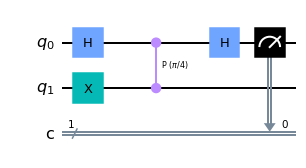

In [2]:
import numpy as np
from qiskit import QuantumCircuit
qc = QuantumCircuit(2, 1)

qc.h(0)
qc.x(1)
qc.cp(np.pi/4, 0, 1)
qc.h(0)
qc.measure([0], [0])
qc.draw(output='mpl')

We have`H`, `X`, and controlled-`P` gates, all of which are not in our devices basis gate set, and must be expanded.  This expansion is taken care of for us in the `qiskit.execute` function. However, we can decompose the circuit to show what it would look like in the native gate set of the IBM Quantum devices:

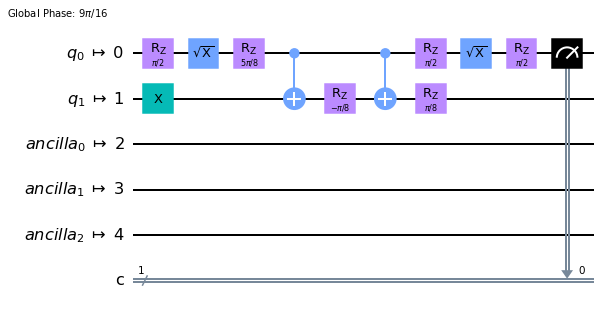

In [3]:
from qiskit import transpile

qc_basis = transpile(qc, backend)
qc_basis.draw(output='mpl')

A few things to highlight. First, the circuit has gotten longer with respect to the initial one. This can be verified by checking the depth of the circuits:

In [4]:
print('Original depth:', qc.depth(), 'Decomposed Depth:', qc_basis.depth())

Original depth: 4 Decomposed Depth: 10


Second, although we had a single controlled gate, the fact that it was not in the basis set means that, when expanded, it requires more than a single cx gate to implement. All said, unrolling to the basis set of gates leads to an increase in the depth of a quantum circuit and the number of gates.

It is important to highlight two special cases:

A SWAP gate is not a native gate on the IBM Q devices, and must be decomposed into three CNOT gates:


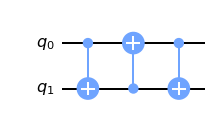

In [5]:
swap_circ = QuantumCircuit(2)
swap_circ.swap(0, 1)
swap_circ.decompose().draw(output='mpl')

As a product of three CNOT gates, SWAP gates are expensive operations to perform on a noisy quantum devices. However, such operations are usually necessary for embedding a circuit into the limited entangling gate connectivities of actual devices. Thus, minimizing the number of SWAP gates in a circuit is a primary goal in the transpilation process.

A Toffoli, or controlled-controlled-not gate (ccx), is a three-qubit gate. Given that our basis gate set includes only single- and two-qubit gates, it is obvious that this gate must be decomposed. This decomposition is quite costly:

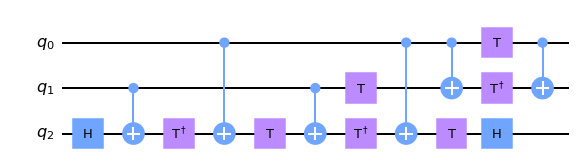

In [6]:
ccx_circ = QuantumCircuit(3)
ccx_circ.ccx(0, 1, 2)
ccx_circ.decompose().draw(output='mpl')

For every Toffoli gate in a quantum circuit, the IBM Quantum hardware may execute up to six CNOT gates, and a handful of single-qubit gates. From this example, it should be clear that any algorithm that makes use of multiple Toffoli gates will end up as a circuit with large depth and will therefore be appreciably affected by noise and gate errors.

You can also unroll a circuit for a certain gateset using the PassManager object as below:

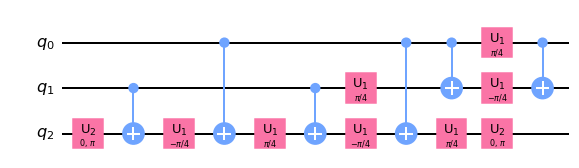

In [7]:
from qiskit import QuantumCircuit
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager

from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u1', 'u2', 'u3', 'cx'])
pm = PassManager(pass_)
new_circ = pm.run(ccx_circ)
new_circ.draw(output='mpl')

#### Initial Layout

Quantum circuits are abstract entities whose qubits are “virtual” representations of actual qubits used in computations. We need to be able to map these virtual qubits in a one-to-one manner to the “physical” qubits in an actual quantum device.

Currently ``optimization_level`` 0 through 3 are supported; the higher the number, the more optimized it is, at the expense of more time. Choosing a good pass manager may take trial and error, as it depends heavily on the circuit being transpiled and the backend being targeted.
- ``optimization_level=0``: just maps the circuit to the backend, with no explicit optimization (except whatever optimizations the mapper does).

- ``optimization_level=1``: maps the circuit, but also does light-weight optimizations by collapsing adjacent gates.

- ``optimization_level=2``: medium-weight optimization, including a noise-adaptive layout and a gate-cancellation procedure based on gate commutation relationships.

- ``optimization_level=3``: heavy-weight optimization, which in addition to previous steps, does resynthesis of two-qubit blocks of gates in the circuit.

**By default, qiskit will do this mapping for you.**  The choice of mapping depends on the properties of the circuit, the particular device you are targeting, and the optimization level that is chosen.  The basic mapping strategies are the following:
- **Trivial layout**: Map virtual qubits to the same numbered physical qubit on the device, i.e. `[0,1,2,3,4]` -> `[0,1,2,3,4]` (default in `optimization_level=0` and `optimization_level=1`).
- **Dense layout**: Find the sub-graph of the device with same number of qubits as the circuit with the greatest connectivity (default in `optimization_level=2` and `optimization_level=3`). 

The choice of initial layout is extremely important when:
1. Computing the number of SWAP operations needed to map the input circuit onto the device topology.
2. Taking into account the noise properties of the device. The choice of `initial_layout` can mean the difference between getting a result, and getting nothing but noise. 


Let's see what layouts are automatically picked at various optimization levels.  The modified circuits returned by `qiskit.compiler.transpile` have this initial layout information in them, and we can view this layout selection graphically using `qiskit.visualization.plot_circuit_layout`

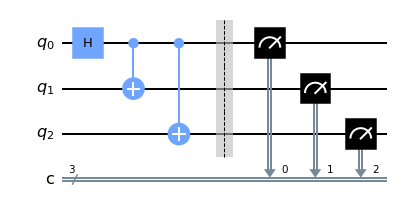

In [89]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_circuit_layout
from qiskit.providers.fake_provider import FakeVigo
backend = FakeVigo()

ghz = QuantumCircuit(3, 3)
ghz.h(0)
ghz.cx(0,range(1,3))
ghz.barrier()
ghz.measure(range(3), range(3))
ghz.draw(output='mpl')

##### Layout Using Optimization Level 0

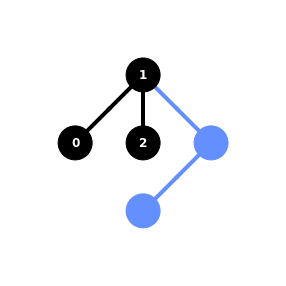

In [90]:
new_circ_lv0 = transpile(ghz, backend=backend, optimization_level=0)
plot_circuit_layout(new_circ_lv0, backend)

##### Layout Using Optimization Level 3

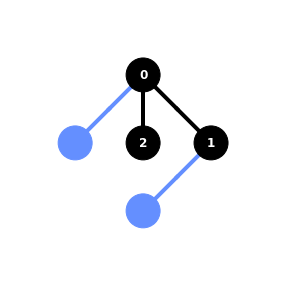

In [91]:
new_circ_lv3 = transpile(ghz, backend=backend, optimization_level=3)
plot_circuit_layout(new_circ_lv3, backend)

It is completely possible to specify your own initial layout. To do so we can pass a list of integers to `qiskit.compiler.transpile()` via the _initial_layout keyword argument_, where the index labels the virtual qubit in the circuit and the corresponding value is the label for the physical qubit to map onto:

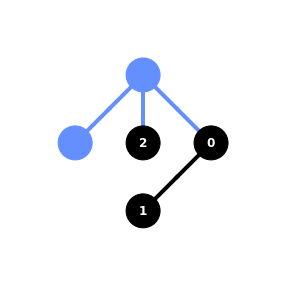

In [11]:
# Virtual -> physical
#    0    ->    3
#    1    ->    4
#    2    ->    2

my_ghz = transpile(ghz, backend, initial_layout=[3, 4, 2])
plot_circuit_layout(my_ghz, backend)

## Real Hardware 🎉

In [ ]:
from qiskit.tools.jupyter import *
%qiskit_backend_overview

In [49]:
from qiskit_ibm_provider import IBMProvider, least_busy
# Save account credentials if this is your first time running it.
# IBMProvider.save_account(token="", overwrite=True)

# Load previously saved account credentials.
provider = IBMProvider(instance='ibm-q/open/main')

# Get the least-busy backend 
least_busy_device = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 1 and
                                   not b.configuration().simulator and b.status().operational==True))

print("The least busy backend currently is " + least_busy_device.name)

least_busy_device

The least busy backend currently is ibm_nairobi


<IBMBackend('ibm_nairobi')>

In [ ]:
#Transpile for real device
bell_circ_real = transpile(bell, least_busy_device)
job = least_busy_device.run(bell_circ_real)

# Monitoring our job
from qiskit_ibm_provider.job import job_monitor
print(f"Job ID: {job.job_id()}")
job_monitor(job)

In [ ]:
# Run and get counts
counts_real = job.result.get_counts(bell_circ_real)
print(counts_real)

(See Lab jobs tab for job progress)

In [ ]:
# your_provider = IBMProvider(instance='your-hub-name/your-group-name/your-project-name')

# your_backend = your_provider.get_backend('ibmq_montreal')

# your_result = your_backend.run(bell_circ_real).result()

# counts_real = result.get_counts(bell_circ_real)

Qiskit is backend agnostic!

In [ ]:
# !pip install qiskit-ionq

# from qiskit_ionq import IonQProvider
# provider = IonQProvider()

# ionq_backend = provider.get_backend("ionq_qpu")
# job = ionq_backend.run(bell)

# plot_histogram(job.get_counts())

### Dynamic circuits and control flow operations - new syntax for Qiskit Terra 0.23!**

According to the [Qiskit textbook,](https://learn.qiskit.org/course/ch-algorithms/quantum-circuits) 
>_"A quantum circuit is a computational routine consisting of coherent quantum operations on qubits ... It is an ordered sequence of quantum gates, measurements and resets, all of which may be conditioned on and use data from the real-time classical computation."_

You might not be familiar with the last part of the definition, but it has everything to do with dynamic circuits. Usually when we talk about quantum circuits, we're referring to _static_ quantum circuits, even if we don't explicitly say it. So what are dynamic circuits?

**Dynamic circuits** are quantum circuits that contain mid-circuit measurements where the results of those measurements are used to condition quantum gates later in the circuit. The ability to condition future quantum operations on the classical measurement results is known as classical feedforward.

Why do we need classical feedforward? An example may help: Consider the conditional reset operation, which may sound familiar if you've ever used the [`reset`](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.reset.html) operation in Qiskit. While the reset operation is a non-unitary operation that resets the qubit to the zero state no matter the initial state, the conditional reset operation is performed on an already measured qubit to reset it to zero by applying a bit-flip X gate only if the qubit is in the one state, as determined from its measured value. The conditional reset can be a faster and less error-prone way to reset a qubit if it has already been measured.

<center>
<img src="sketch-1.png" width="50%">
</center>

Put another way, dynamic circuits are quantum circuits that include control flow such as if statements and while loops, where the predicates are computed from the results of previous qubit measurements and the conditional operations include quantum gates.

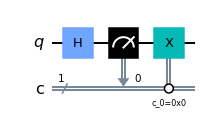

In [41]:
# Previous syntax

qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)
qc.x(0).c_if(0, False)
qc.draw(output='mpl')

In [45]:
qc = QuantumCircuit(1, 2)
qc.h(0)  # This is just a stand-in for more complex real-world setup.
qc.measure(0, 0)

# Unlike c_if, we can have more than one instruction in the block, and it only
# requires a single evaluation of the condition.  That's especially important if
# the bit is written to part way through the block.
with qc.if_test((0, True)): # if q0 == 1, reset and flip it
    qc.reset(0)
    qc.x(0)
qc.measure(0, 1)

qc.draw(output="mpl")
# compiled_circuit = transpile(qc, simulator)
# simulator.run(compiled_circuit).result().get_counts()  # {'00': 0.5, '11': 0.5}

{'11': 536, '00': 488}

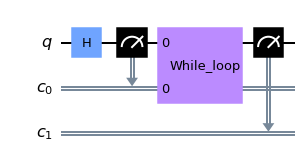

In [40]:
# Repeat instructions until success with while loop
# Previously this wasn't representable in Qiskit at all, because we didn't have
# any concept of a run-time loop.

qc = QuantumCircuit(1, 2)
qc.h(0)
qc.measure(0, 0)
with qc.while_loop((0, False)): # as long as q0 == 0, reset, add h and measure again until q0 == 1
    qc.reset(0)
    qc.h(0)
    qc.measure(0, 0)
qc.measure(0, 1)

qc.draw(output="mpl")
# compiled_circuit = transpile(qc, simulator)
#  simulator.run(qc).result().get_counts()  # {'11': 1}

## Visualising Circuits

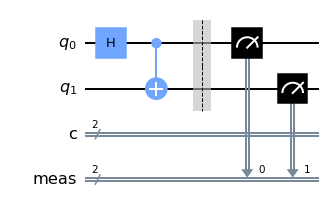

In [76]:
bell.draw(output="mpl")

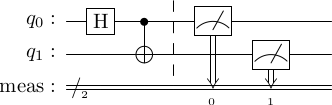

In [31]:
bell.draw(output='latex')

In [32]:
bell.draw(output='text')

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

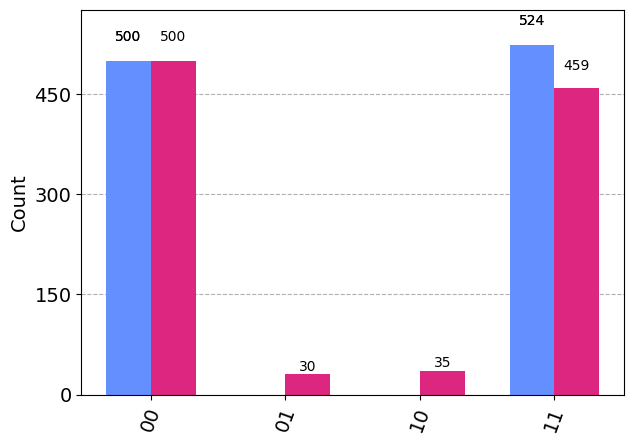

In [33]:
from qiskit.visualization import plot_histogram

data = [counts, counts_noise]

plot_histogram(data)

Many visualisation functions play well with matplotlib, so you can sued some more advanced styling features. some common arguments for all visualisation functions:
    
- `title` (str): a text string to use for the plot title.
- `legend` (list): a list of strings to use for labels of the data.
- `figsize` (tuple): figure size in inches .
- `color` (list): a list of strings for plotting.
- `ax` (`matplotlib.axes.Axes`): An optional Axes object to be used for the visualization output. If none is specified a new `matplotlib.figure.Figure` will be created and used. Additionally, if specified there will be no returned Figure since it is redundant.
- `filename` (str): file path to save image to.

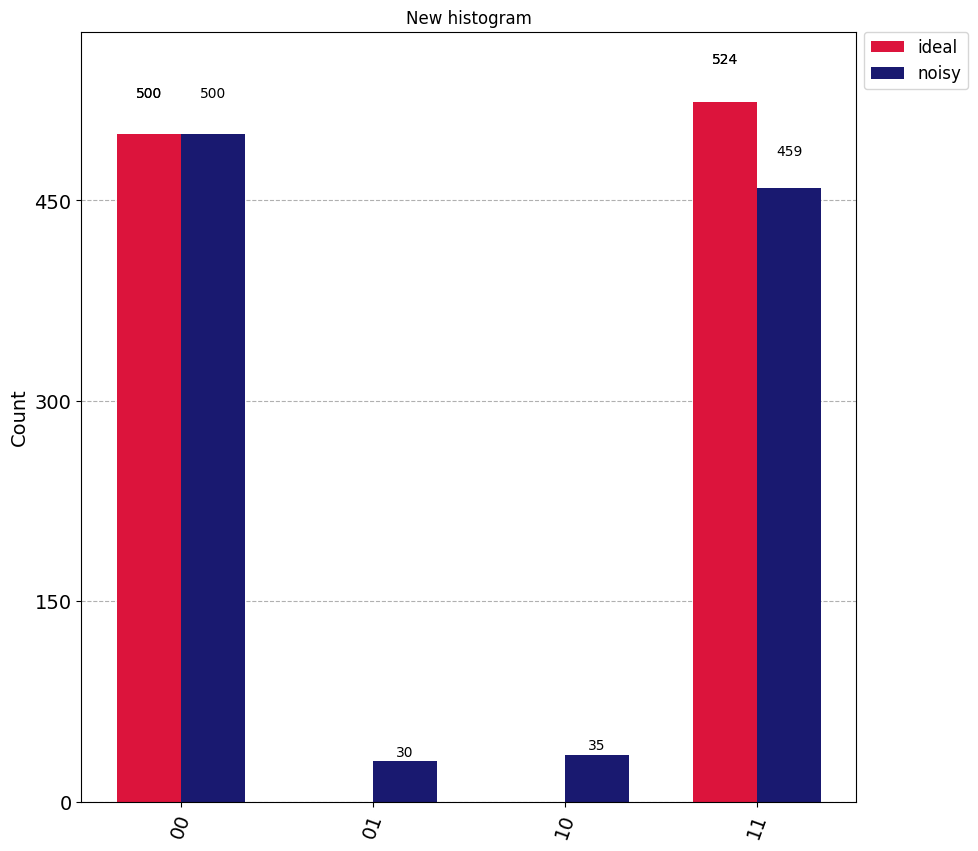

In [34]:
legend = ['ideal', 'noisy']
title = 'New histogram'
figsize = (10,10)
color=['crimson','midnightblue']
plot_histogram(data, legend=legend, title=title, figsize=figsize, color=color)

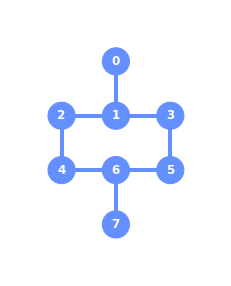

In [3]:
# visualise coupling maps (for device layouts) - small heavy hex

from qiskit.visualization import plot_coupling_map

num_qubits = 8
qubit_coordinates = [[0, 1], [1, 1], [1, 0], [1, 2], [2, 0], [2, 2], [2, 1], [3, 1]]
coupling_map = [[0, 1], [1, 2], [1, 3], [3, 5], [4, 6], [6, 5], [2, 4], [6, 7]]
plot_coupling_map(num_qubits, qubit_coordinates, coupling_map)

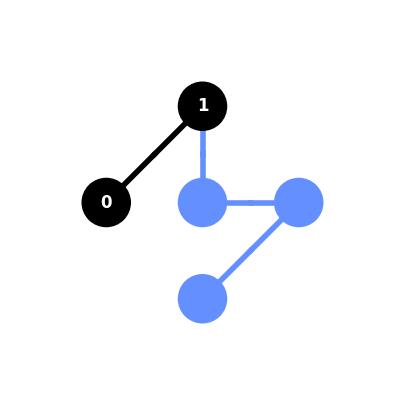

In [36]:
# visualise how your qubits will be laid out on a given device

from qiskit.visualization import plot_circuit_layout

backend = provider.get_backend('ibmq_manila')

belem_bell = transpile(bell, backend=backend)

plot_circuit_layout(belem_bell, backend)

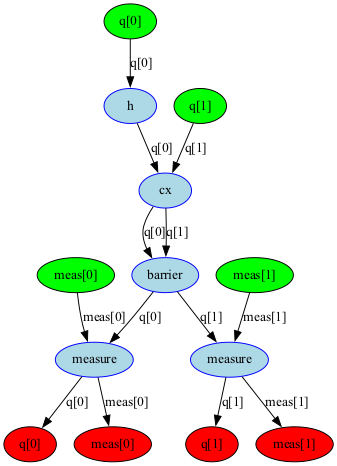

In [37]:
# DAG Drawer
from qiskit.dagcircuit import DAGCircuit
from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer

dag = circuit_to_dag(bell)
dag_drawer(dag)

## Primitives - New(ish) Feature 🎉

To understand Qiskit Runtime Primitives we need to take a trip down IBM Quantum memory lane...

![](circuit_flow.png)

![](runtime_prog_flow.png)

![](circ_runtime_comparison.png)

![](what_we_want.png)

![](primitives.png)

![](primitives_comparison.png)

![](sampler_estimator.png)


#### Simple Sampler Example

In [38]:
bell.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

In [39]:
from qiskit.primitives import Sampler

sampler = Sampler(options={"shots": 100})
job = sampler.run(bell) # uses local simulator under the hood
result = job.result()

print(result)

SamplerResult(quasi_dists=[{0: 0.52, 3: 0.48}], metadata=[{'shots': 100}])


#### Simple Estimator Example

In [7]:
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import EfficientSU2

observable = SparsePauliOp(["ZZ"])
ansatz = EfficientSU2(2, reps=1).decompose()
values = np.random.random(ansatz.num_parameters)

ansatz.draw()

┌──────────┐┌──────────┐     ┌──────────┐┌──────────┐
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[2]) ├──■──┤ Ry(θ[4]) ├┤ Rz(θ[6]) ├
     ├──────────┤├──────────┤┌─┴─┐├──────────┤├──────────┤
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[3]) ├┤ X ├┤ Ry(θ[5]) ├┤ Rz(θ[7]) ├
     └──────────┘└──────────┘└───┘└──────────┘└──────────┘

In [8]:
from qiskit.primitives import Estimator

estimator = Estimator()
job = estimator.run(3*[ansatz], 3*[observable], 3*[values]) # calls simulator under the hood
result = job.result()

print(result)

EstimatorResult(values=array([0.84399055, 0.84399055, 0.84399055]), metadata=[{}, {}, {}])


![](primitives_code.png)

#### Use Primitives with IBM Devices via Sessions - (Alpha: Still under active development)

If you want to get results from IBM hardware using primitives, you need to use the `qiskit_ibm_runtime` provider, which facilitates the connection to the IBM hardware via sessions.

In [57]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler
from qiskit import QuantumCircuit

# QiskitRuntimeService.save_account(channel='ibm_quantum', token='my_token', overwrite=True) #uncomment if you need to save your account again
service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
)

print(service.backends())

# Get the least-busy backend 
# provider = IBMProvider(instance='ibm-q/open/main')
# backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 1 and
#                                    not b.configuration().simulator and b.status().operational==True))

# print("The best backend is " + backend.name)
# backend = backend.name


# # Execute the Bell circuit
# with Session(service=service, backend="ibm_oslo") as session:
#     primitive = Sampler(session=session)

#     # now we can run multiple jobs but only queue once
#     job = primitive.run([bell], [[]])
#     samples = job.result().quasi_dists[0]
#     print(samples)

#     job = primitive.run([bell], [[]])
#     samples = job.result().quasi_dists[0]
#     print(samples)

[<IBMBackend('ibmq_quito')>, <IBMBackend('ibmq_lima')>, <IBMBackend('ibmq_belem')>, <IBMBackend('simulator_statevector')>, <IBMBackend('ibmq_jakarta')>, <IBMBackend('ibmq_qasm_simulator')>, <IBMBackend('simulator_extended_stabilizer')>, <IBMBackend('simulator_mps')>, <IBMBackend('simulator_stabilizer')>, <IBMBackend('ibmq_manila')>, <IBMBackend('ibm_nairobi')>, <IBMBackend('ibm_lagos')>, <IBMBackend('ibm_perth')>, <IBMBackend('ibm_brisbane')>, <IBMBackend('ibmq_guadalupe')>, <IBMBackend('ibm_hanoi')>, <IBMBackend('ibmq_kolkata')>, <IBMBackend('ibm_cairo')>, <IBMBackend('ibmq_mumbai')>, <IBMBackend('ibm_auckland')>, <IBMBackend('ibm_sherbrooke')>, <IBMBackend('ibm_seattle')>, <IBMBackend('ibm_washington')>, <IBMBackend('ibm_oslo')>, <IBMBackend('ibm_peekskill')>]


# Optional Content: High Level Applications - Qiskit Finance - Portfolio Optimization


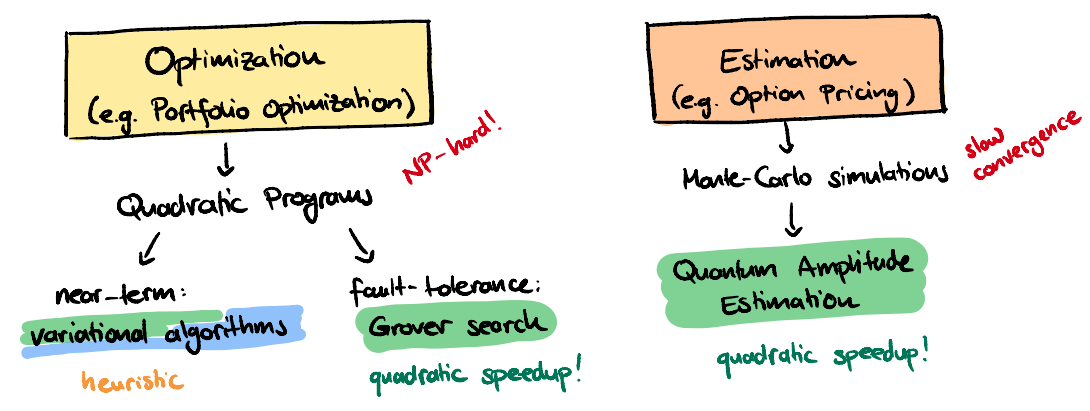

## Goal: Portfolio optimization

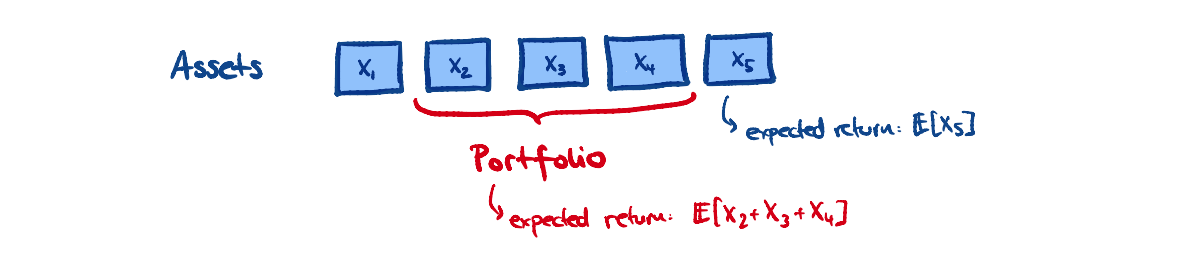

How can we optimize the portfolio to have the maximum return but at the same time has a small risk?

Optimal solution $\vec x^*$:

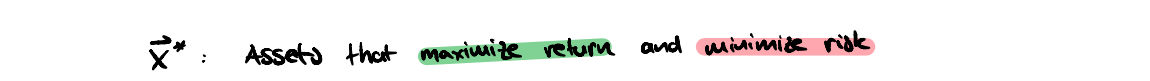

Or in a formula:

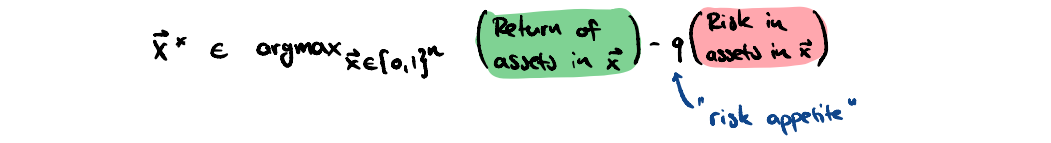

In [9]:
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver, QAOA, SamplingVQE
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal
from qiskit.result import QuasiDistribution
from qiskit_aer.primitives import Sampler
from qiskit_finance.applications.optimization import PortfolioOptimization
from qiskit_finance.data_providers import RandomDataProvider
from qiskit_optimization.algorithms import MinimumEigenOptimizer
import numpy as np
import matplotlib.pyplot as plt
import datetime

## To define the problem:

This tutorial shows how to solve the following mean-variance portfolio optimization problem for $n$ assets:

$$\begin{aligned}
\min_{x \in \{0, 1\}^n}  q x^T \Sigma x - \mu^T x\\
\text{subject to: } 1^T x = B
\end{aligned}$$

where we use the following notation:

- $x \in \{0, 1\}^n$ denotes the vector of binary decision variables, which indicate which assets to pick ($x[i] = 1$) and which not to pick ($x[i] = 0$),
- $\mu \in \mathbb{R}^n$ defines the expected returns for the assets,
- $\Sigma \in \mathbb{R}^{n \times n}$ specifies the covariances between the assets,
- $q > 0$ controls the risk appetite of the decision maker,
- and $B$ denotes the budget, i.e. the number of assets to be selected out of $n$.

We assume the following simplifications:
- all assets have the same price (normalized to 1),
- the full budget $B$ has to be spent, i.e. one has to select exactly $B$ assets.

The equality constraint $1^T x = B$ is mapped to a penalty term $(1^T x - B)^2$ which is scaled by a parameter and subtracted from the objective function. 
The resulting problem can be mapped to a Hamiltonian whose ground state corresponds to  the optimal solution.
This notebook shows how to use the Sampling Variational Quantum Eigensolver (`SamplingVQE`) or the Quantum Approximate Optimization Algorithm (`QAOA`) to find the optimal solution for a given set of parameters.

Experiments on real quantum hardware for this problem are reported for instance in the following paper:
<br>
[Improving Variational Quantum Optimization using CVaR. Barkoutsos et al. 2019.](https://arxiv.org/abs/1907.04769)

## Define problem instance

Here an Operator instance is created for our Hamiltonian. In this case the paulis are from an Ising Hamiltonian translated from the portfolio problem. We use a random portfolio problem for this notebook. It is straight-forward to extend this to using real financial data as illustrated here:<br>
[Loading and Processing Stock-Market Time-Series Data](11_time_series.ipynb)

In [10]:
# set number of assets (= number of qubits)
num_assets = 7
seed = 200

# Generate expected return and covariance matrix from (random) time-series
stocks = [("TICKER%s" % i) for i in range(num_assets)]
data = RandomDataProvider(
    tickers=stocks,
    start=datetime.datetime(2016, 1, 1),
    end=datetime.datetime(2016, 1, 30),
    seed=seed,
)
data.run()
mu = data.get_period_return_mean_vector()
sigma = data.get_period_return_covariance_matrix()

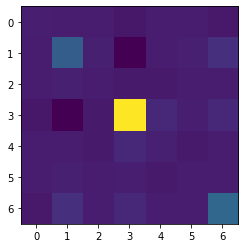

In [11]:
# plot sigma
plt.imshow(sigma, interpolation="nearest")
plt.show()

## Converting to quadratic program

In [15]:
q = 0.5  # set risk factor
budget = num_assets // 2  # set budget
penalty = num_assets  # set parameter to scale the budget penalty term

portfolio = PortfolioOptimization(
    expected_returns=mu, covariances=sigma, risk_factor=q, budget=budget
)
qp = portfolio.to_quadratic_program()
qp

<QuadraticProgram: minimize 0.00011624822713042303*x_0^2 + 0.00011662270894401..., 7 variables, 1 constraints, 'Portfolio optimization'>

We define some utility methods to print and display the results in a nice format.

In [16]:
def print_result(result):
    selection = result.x
    value = result.fval
    print("Optimal: selection {}, value {:.4f}".format(selection, value))

    eigenstate = result.min_eigen_solver_result.eigenstate
    probabilities = (
        eigenstate.binary_probabilities()
        if isinstance(eigenstate, QuasiDistribution)
        else {k: np.abs(v) ** 2 for k, v in eigenstate.to_dict().items()}
    )
    print("\n----------------- Full result ---------------------")
    print("selection\tvalue\t\tprobability")
    print("---------------------------------------------------")
    probabilities = sorted(probabilities.items(), key=lambda x: x[1], reverse=True)

    for k, v in probabilities:
        x = np.array([int(i) for i in list(reversed(k))])
        value = portfolio.to_quadratic_program().objective.evaluate(x)
        print("%10s\t%.4f\t\t%.4f" % (x, value, v))

In [17]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(eval_count, weights, obj_func_eval, meta):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

### Recap on the Variational Quantum Eigensolver

Goal: Find ground state $|\Psi\rangle$ of the Hamiltonian $H$.

Idea: Choose model $|\phi(\theta)\rangle$ that can approximate $|\Psi\rangle$ well and minimize the energy

$$
    \theta^* = \text{argmin}_\theta E(\theta) = \text{argmin}_\theta \langle\phi(\theta)|H|\phi(\theta)\rangle 
$$

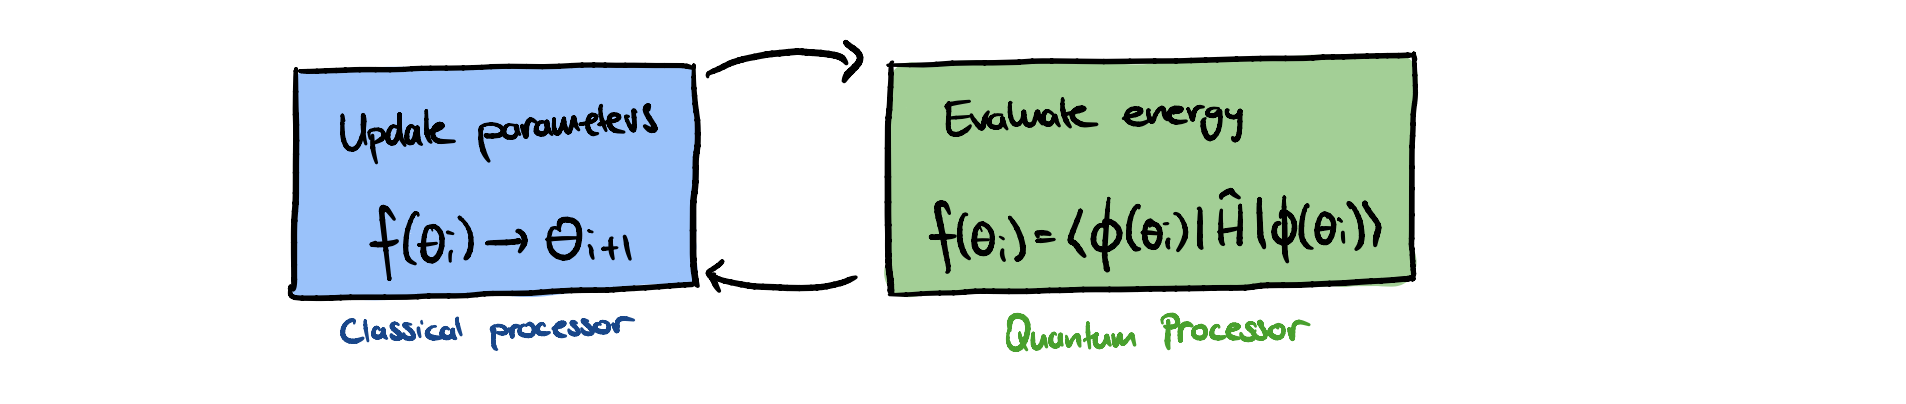

With special $H$ we can solve quadratic unconstrained binary optimizations (QUBOs)!

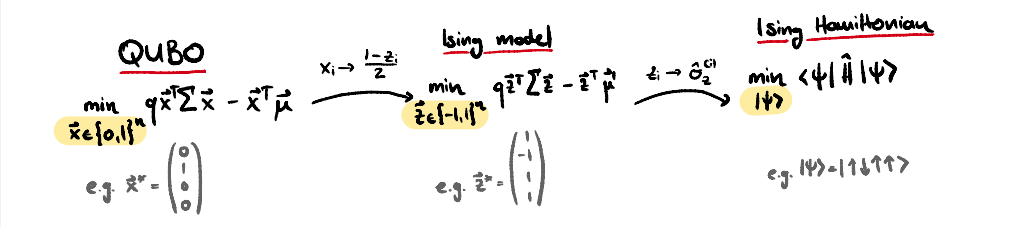

### Solving the program with the VQE

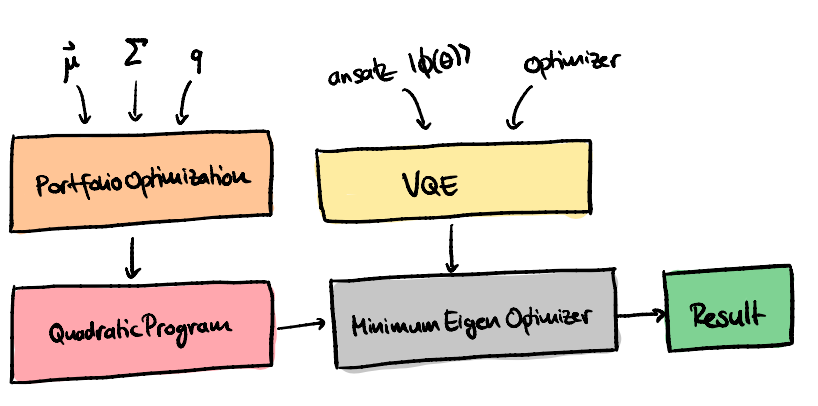

## Solution using `SamplingVQE`
We can now use the Sampling Variational Quantum Eigensolver (`SamplingVQE`) to solve the problem. We will specify the optimizer and variational form to be used.

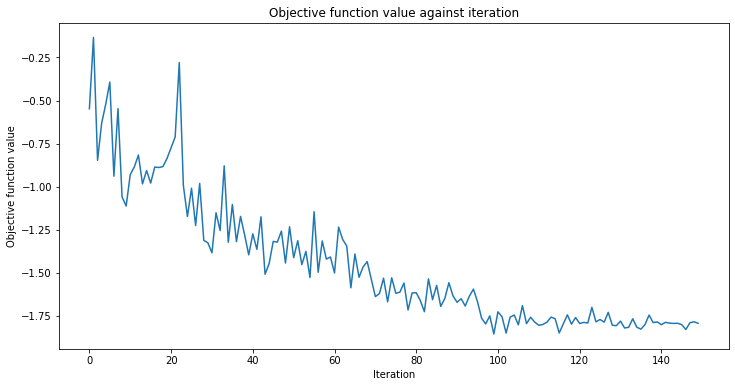

Optimal: selection [1. 0. 1. 0. 0. 1. 0.], value 0.0033

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
[1 0 0 0 1 1 0]	0.0099		0.5068
[1 0 0 0 0 1 0]	0.0024		0.1162
[1 0 1 0 1 0 0]	0.0093		0.1113
[0 1 1 0 0 0 1]	0.0188		0.0352
[0 1 0 0 0 1 1]	0.0193		0.0322
[1 0 1 0 0 0 0]	0.0018		0.0283
[0 0 1 0 0 0 1]	0.0138		0.0254
[0 0 1 1 0 0 1]	0.0450		0.0225
[0 1 1 0 0 0 0]	0.0045		0.0107
[1 1 1 0 0 0 1]	0.0197		0.0088
[1 0 1 0 0 1 0]	0.0033		0.0078
[1 0 0 0 1 1 1]	0.0227		0.0078
[1 0 0 0 1 0 0]	0.0084		0.0049
[1 0 0 0 0 1 1]	0.0151		0.0039
[0 1 0 0 1 1 0]	0.0125		0.0039
[1 0 1 0 1 0 1]	0.0222		0.0039
[0 0 0 0 1 1 1]	0.0218		0.0039
[0 1 1 1 0 0 0]	0.0332		0.0029
[0 0 1 1 1 0 1]	0.0533		0.0029
[0 1 0 0 0 1 0]	0.0051		0.0029
[0 0 0 0 0 1 1]	0.0143		0.0029
[0 0 1 0 1 0 1]	0.0213		0.0029
[1 1 0 0 1 1 1]	0.0278		0.0029
[0 1 0 1 0 1 1]	0.0491		0.0020
[0 0 0 1 0 1 1]	0.0457		0.0020
[1 1 1 1 0 0 1]	0.0491		0.0020
[1 1

In [18]:
from qiskit.circuit.library import RealAmplitudes, EfficientSU2, ExcitationPreserving, PauliTwoDesign, TwoLocal, NLocal
from qiskit.algorithms.optimizers import COBYLA, SPSA, L_BFGS_B, NELDER_MEAD, UMDA, TNC

from qiskit.utils import algorithm_globals
objective_func_vals = []
algorithm_globals.random_seed = 1234

cobyla = COBYLA()
cobyla.set_options(maxiter=150)
ry = TwoLocal(num_assets, "ry", "cz", reps=3, entanglement="full")
vqe_mes = SamplingVQE(sampler=Sampler(), ansatz=ry, optimizer=cobyla, callback=callback_graph)
vqe = MinimumEigenOptimizer(vqe_mes)
result = vqe.solve(qp) 

print_result(result)

### Solution using `QAOA`

We also show here a result using the Quantum Approximate Optimization Algorithm (`QAOA`). This is another variational algorithm and it uses an internal variational form that is created based on the problem.

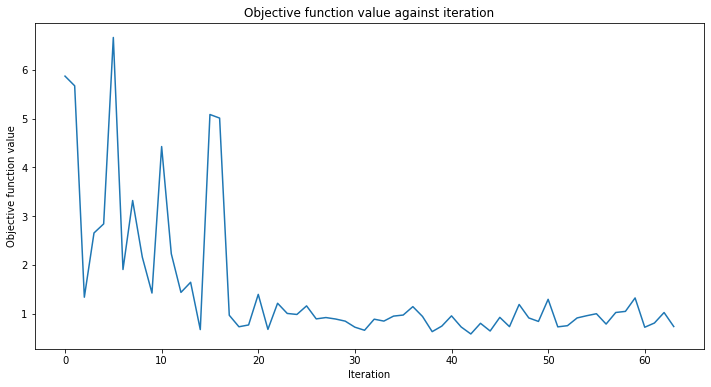

Optimal: selection [1. 0. 1. 0. 0. 1. 0.], value 0.0033

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
[1 1 1 1 1 1 1]	0.0596		0.0811
[1 1 0 0 1 0 1]	0.0260		0.0332
[0 1 1 0 1 0 1]	0.0263		0.0332
[0 0 0 0 0 0 0]	0.0000		0.0322
[1 1 1 0 0 0 1]	0.0197		0.0293
[1 0 0 0 1 1 1]	0.0227		0.0293
[0 0 1 1 1 1 0]	0.0410		0.0283
[1 0 1 0 0 1 1]	0.0162		0.0273
[1 1 1 0 0 1 0]	0.0074		0.0254
[1 1 1 1 0 0 0]	0.0341		0.0234
[1 0 1 1 0 0 1]	0.0456		0.0225
[0 0 0 1 1 1 1]	0.0541		0.0215
[1 1 1 0 1 0 0]	0.0131		0.0215
[1 1 0 1 0 0 1]	0.0478		0.0215
[0 1 1 0 0 1 1]	0.0206		0.0215
[0 1 1 0 1 1 0]	0.0136		0.0215
[1 1 0 1 0 1 0]	0.0349		0.0205
[0 1 0 1 0 1 1]	0.0491		0.0205
[0 1 1 1 0 0 1]	0.0483		0.0205
[0 1 1 1 1 0 0]	0.0415		0.0195
[0 0 1 1 1 0 1]	0.0533		0.0195
[1 0 1 1 0 1 0]	0.0336		0.0195
[1 1 0 0 0 1 1]	0.0202		0.0195
[0 1 0 0 1 1 1]	0.0268		0.0195
[0 1 1 1 0 1 0]	0.0351		0.0186
[1 1 0 0 1 1 0]	0.0136		0.0186
[0 0

In [67]:
algorithm_globals.random_seed = 1234
objective_func_vals = []

cobyla = COBYLA()
cobyla.set_options(maxiter=250)
qaoa_mes = QAOA(sampler=Sampler(), optimizer=cobyla, reps=3, callback=callback_graph)
qaoa = MinimumEigenOptimizer(qaoa_mes)
result = qaoa.solve(qp)

print_result(result)

# Optional Content: Low Level Applications - Qiskit Experiments (previously qiskit ignis)

Qiskit Experiments provides both a library of standard quantum characterization, calibration, and verification experiments, and a general framework for implementing custom experiments which can be run on quantum devices through Qiskit. Most useful part -> Experiment Library

**E.g. Randomised Benchmarking**  
A randomized benchmarking (RB) experiment consists of the generation of random Clifford circuits on the given qubits such that the unitary computed by the circuits is the identity. After running the circuits, the number of shots resulting in an error (i.e. an output different than the ground state) are counted, and from this data one can infer error estimates for the quantum device, by calculating the Error Per Clifford. See Qiskit Textbook for an explanation on the RB method

In [7]:
!pip install qiskit-experiments --quiet

Adding a job from a backend (aer_simulator) that is different than the current backend (fake_belem). The new backend will be used, but service is not changed if one already exists.


Gate error ratio: {'rz': 0.0, 'sx': 1.0, 'x': 1.0}


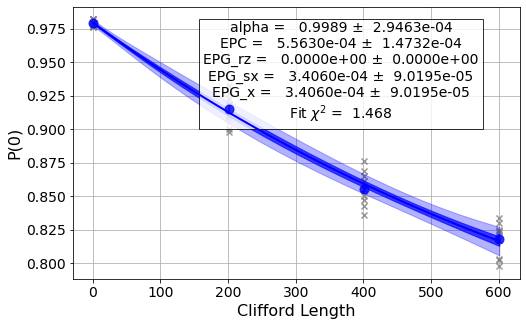

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.3343134877045371, 0.9988874004142957, 0.6452167287093443]
- χ²: 1.4675505159430613
- quality: good
- extra: <4 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.99889+/-0.00029
- χ²: 1.4675505159430613
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.00056+/-0.00015
- χ²: 1.4675505159430613
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_rz
- value: 0.0+/-0
- χ²: 1.4675505159430613
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_sx
- value: 0.00034+/-0.00009
- χ²: 1.4675505159430613
- quality: good
- extra: <1 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_x
- value: 0.00034+/-0.00009
- χ²: 1.4675505159430613
- quality: good
- extra: <1 items>


In [10]:
import numpy as np
from qiskit_experiments.library import StandardRB, InterleavedRB
from qiskit_experiments.framework import ParallelExperiment, BatchExperiment
import qiskit.circuit.library as circuits
from qiskit.providers.fake_provider import FakeBelem

backend = FakeBelem()

lengths = np.arange(1, 800, 200)
num_samples = 10
seed = 1010
qubits = [0]

# Run an RB experiment on qubit 0
exp1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
print("Gate error ratio: %s" % expdata1.experiment.analysis.options.gate_error_ratio)
display(expdata1.figure(0))
for result in results1:
    print(result)

# Low Level Applications - Qiskit Dynamics

The goal of Qiskit Dynamics is to provide access to different numerical methods, and to automate common processes typically performed by hand, e.g. entering rotating frames, or doing the rotating wave approximation. Qiskit Dynamics can be configured to use either NumPy or JAX as the backend for array operations.

**E.g. Simulating Qiskit Pulse Schedules with Qiskit Dynamics** 
1. Create the pulse schedule
2. Convert Qiskit pulse schedules to Qiskit Dynamics Signals
3. Create the system model, configured to simulate pulse schedules
4. Simulate the pulse schedule using the model

In [11]:
!pip install qiskit-dynamics --quiet

#### 1. Create a Qiskit Pulse Schedule (bonus - use the Qiskit Pulse module!)

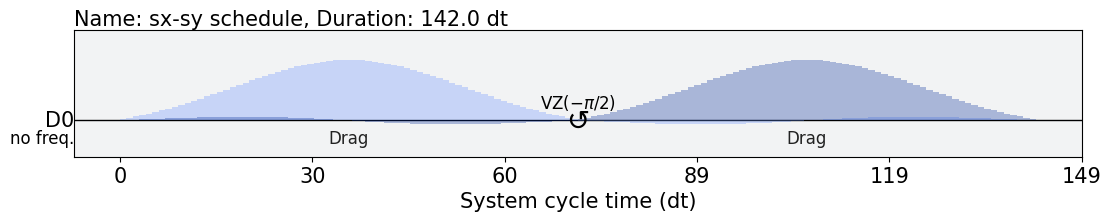

In [12]:
import numpy as np
import qiskit.pulse as pulse

# Strength of the Rabi-rate in GHz.
r = 0.1

# Frequency of the qubit transition in GHz.
w = 5.

# Sample rate of the backend in ns.
dt = 0.222

# Define gaussian envelope function to have a pi rotation.
amp = 1.
area = 1
sig = area*0.399128/r/amp
T = 4*sig
duration = int(T / dt)
beta = 2.0

# The 1.75 factor is used to approximately get a sx gate.
# Further "calibration" could be done to refine the pulse amplitude.
with pulse.build(name="sx-sy schedule") as xp:
    pulse.play(pulse.Drag(duration, amp / 1.75, sig / dt, beta), pulse.DriveChannel(0))
    pulse.shift_phase(np.pi/2, pulse.DriveChannel(0))
    pulse.play(pulse.Drag(duration, amp / 1.75, sig / dt, beta), pulse.DriveChannel(0))

xp.draw()

#### 2. Convert the pulse schedule to a Qiskit Dynamics Signal

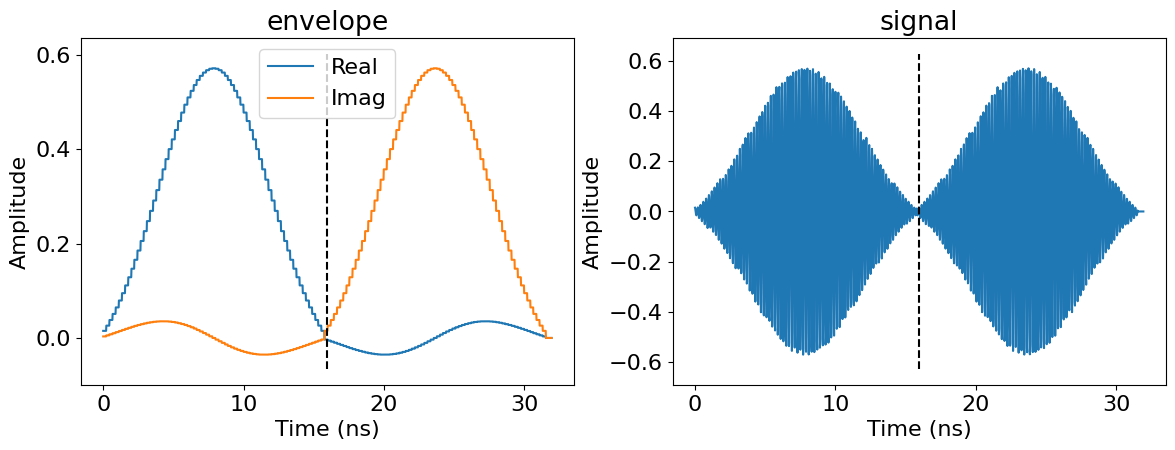

In [13]:
from matplotlib import pyplot as plt
from qiskit_dynamics.pulse import InstructionToSignals

plt.rcParams["font.size"] = 16

converter = InstructionToSignals(dt, carriers={"d0": w})

signals = converter.get_signals(xp)
fig, axs = plt.subplots(1, 2, figsize=(14, 4.5))
for ax, title in zip(axs, ["envelope", "signal"]):
    signals[0].draw(0, 2*T, 2000, title, axis=ax)
    ax.set_xlabel("Time (ns)")
    ax.set_ylabel("Amplitude")
    ax.set_title(title)
    ax.vlines(T, ax.get_ylim()[0], ax.get_ylim()[1], "k", linestyle="dashed")

#### 3. Create the System Model

In [14]:
from qiskit.quantum_info.operators import Operator
from qiskit_dynamics import Solver

# construct operators
X = Operator.from_label('X')
Z = Operator.from_label('Z')

drift = 2 * np.pi * w * Z/2
operators = [2 * np.pi * r * X/2]

# construct the solver
hamiltonian_solver = Solver(
    static_hamiltonian=drift,
    hamiltonian_operators=operators,
    rotating_frame=drift,
    rwa_cutoff_freq=2 * 5.0,
    hamiltonian_channels=['d0'],
    channel_carrier_freqs={'d0': w},
    dt=dt
)

#### 4. Simulate the Pulse schedule using the model

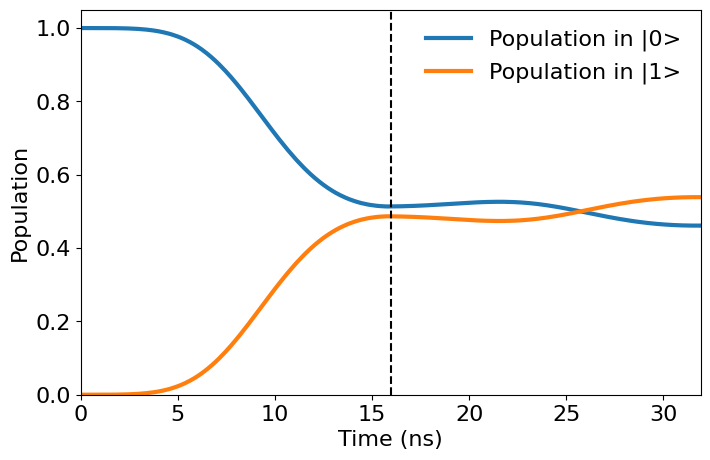

In [15]:
from qiskit.quantum_info.states import Statevector

# Start the qubit in its ground state.
y0 = Statevector([1., 0.])

sol = hamiltonian_solver.solve(t_span=[0., 2*T], y0=y0, signals=xp, atol=1e-8, rtol=1e-8)

def plot_populations(sol):
    pop0 = [psi.probabilities()[0] for psi in sol.y]
    pop1 = [psi.probabilities()[1] for psi in sol.y]

    fig = plt.figure(figsize=(8, 5))
    plt.plot(sol.t, pop0, lw=3, label="Population in |0>")
    plt.plot(sol.t, pop1, lw=3, label="Population in |1>")
    plt.xlabel("Time (ns)")
    plt.ylabel("Population")
    plt.legend(frameon=False)
    plt.ylim([0, 1.05])
    plt.xlim([0, 2*T])
    plt.vlines(T, 0, 1.05, "k", linestyle="dashed")
    
plot_populations(sol)

In [58]:
import qiskit.tools.jupyter

%qiskit_version_table
%qiskit_copyright